## Research of Borrower Reliability 

The customer is the credit department of the bank. It is necessary to find out whether the marital status and the number of children of the client affect the fact of repaying the loan on time.

Research results will be consider  Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Perform data preprocessing. Identify the influence of individual factors on loan repayment.

*Data Structure:*

- *children* — amount of children in family 
- *days_employed* — total work experience in days
- *dob_years* — clients age in years
- *education* — clients level education 
- *education_id* — education level identification 
- *family_status* - marital status
- *family_status_id* - matital status identification 
- *gender* - clients gender
- *income_type* - type of employment
- *debt* - did you have any loan repayment arrears?
- *total_income* - income per month
- *purpose* - purpose of the loan


### Step 1. Data Research 

In [50]:
import pandas as pd
import math as math
import matplotlib.pyplot as plt

from pymystem3 import Mystem # call the pymystem3 library for lemmatization


In [38]:
m = Mystem()

In [39]:
clients_data = pd.read_csv('/datasets/data.csv')
clients_data.info()
display(clients_data.head(10))
print(clients_data[clients_data['days_employed'].isnull()].count()) # проверим на наличие пропусков
print(clients_data['children'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


### Conclusion

Amount of work experience in days and income per month less then in other columns. It seems not all people set this information for those two columns. 2174 gaps were found. It is more than 10% from all data. Gaps are NaN (numerical) and random. 

### Step 2. Data Preparation

In [40]:
columns_list = ['days_employed','total_income']
income_type_list = list(clients_data['income_type'].unique())
avg_child = math.ceil(clients_data['children'].mean()) # average amount of children

for column in columns_list:
    for income in income_type_list:
        clients_data.loc[clients_data['income_type'] == income, column] \
        = clients_data.loc[clients_data['income_type'] == income, column].\
        fillna(clients_data.query('income_type == @income')[column].mean())       

clients_data.loc[clients_data['children'] < 0, 'children'] = avg_child 
#replace the "negative" children with average statistical

In [42]:
column_type = ['total_income','days_employed','children']
for column in column_type:
    clients_data[column] = clients_data[column].astype('int')
#replace float variables with integer ones

clients_data['education'] = clients_data['education'].str.lower() 
#change given to lower case

print('Дубликатов:',clients_data.duplicated().sum())
clients_data = clients_data.drop_duplicates().reset_index(drop=True)
print('Дубликатов:',clients_data.duplicated().sum())

Дубликатов: 71
Дубликатов: 0


Duplicates: 71

Duplicates after cleariang data: 0

In [43]:
clients_data.info() # data checked
print(clients_data['children'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
children            21454 non-null int64
days_employed       21454 non-null int64
dob_years           21454 non-null int64
education           21454 non-null object
education_id        21454 non-null int64
family_status       21454 non-null object
family_status_id    21454 non-null int64
gender              21454 non-null object
income_type         21454 non-null object
debt                21454 non-null int64
total_income        21454 non-null int64
purpose             21454 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB
0     14091
1      4855
2      2052
3       330
20       76
4        41
5         9
Name: children, dtype: int64


### Conclusion

Columns days_employed and total_income are contain numerical values. For the statistic saving gaps are changed to the average by the columns. Some values are equal tk -1 for the children data. This data changed to the average as well. 

Some data in columns, like *days_employed*, *total_income*, were changed to the integer type. 

71 duplicates were found. For educational column data were changed to the lowercase. 


### Lemmatisation and categorysation

In [44]:

def lem_func(row): #function for lemmatisation 
    lem = m.lemmatize(row)
    return lem
clients_data['purpose_lem'] = clients_data['purpose'].apply(lem_func) 
#applied for the purpose column

print(clients_data['purpose_lem'].value_counts())

[автомобиль, \n]                                          972
[свадьба, \n]                                             791
[на,  , проведение,  , свадьба, \n]                       768
[сыграть,  , свадьба, \n]                                 765
[операция,  , с,  , недвижимость, \n]                     675
[покупка,  , коммерческий,  , недвижимость, \n]           661
[операция,  , с,  , жилье, \n]                            652
[покупка,  , жилье,  , для,  , сдача, \n]                 651
[операция,  , с,  , коммерческий,  , недвижимость, \n]    650
[покупка,  , жилье, \n]                                   646
[жилье, \n]                                               646
[покупка,  , жилье,  , для,  , семья, \n]                 638
[строительство,  , собственный,  , недвижимость, \n]      635
[недвижимость, \n]                                        633
[операция,  , со,  , свой,  , недвижимость, \n]           627
[строительство,  , жилой,  , недвижимость, \n]            624
[покупка

In [66]:
def goal_func(row): # changing lemmatized column to the credit category 
    
    if 'автомобиль' in row:
        return 'автокредит'
    if  'жилье' in row:
        return 'недвижимость'
    if  'недвижимость'in row:
        return 'недвижимость'
    if  'свадьба' in row:
        return 'потребительский'
    if 'образование' in row:
        return 'образовательский'
    
clients_data['purpose_goal'] = clients_data['purpose_lem'].apply(goal_func)

print(clients_data['purpose_goal'].value_counts())

def income_func(row): # function for the categorisation by income 
    inc = row['total_income']
    
    if inc < 10329:
        return 'ниже мрот'
    if inc < 80000:
        return 'ниже среднего'
    if inc < 120000:
        return 'средний'
    if inc < 300000:
        return 'выше среднего'
    if inc >= 300000:
        return 'богатый'
        
clients_data['income_category'] = clients_data.apply(income_func, axis=1)
print(clients_data['income_category'].value_counts())

def kids(row): # function for categorisation by children amount 
    kid = row['children']
    
    if kid == 0:
        return 'нет детей'
    if kid == 1:
        return 'один ребенок'
    if kid == 2:
        return 'два ребенка'
    if kid >= 3:
        return 'многодетная семья'
        
clients_data['kids_category'] = clients_data.apply(kids, axis=1)
print(clients_data['kids_category'].value_counts())

недвижимость        10811
автокредит           4306
образовательский     4013
потребительский      2324
Name: purpose_goal, dtype: int64
выше среднего    13126
средний           4569
ниже среднего     2276
богатый           1483
Name: income_category, dtype: int64
нет детей            14091
один ребенок          4855
два ребенка           2052
многодетная семья      456
Name: kids_category, dtype: int64


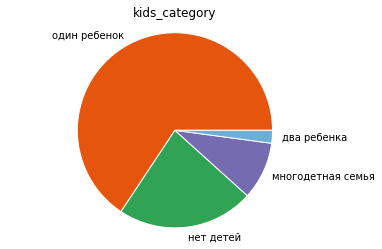

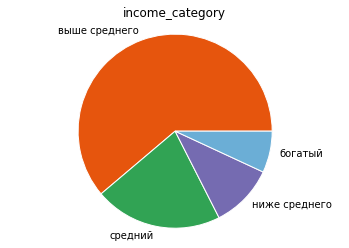

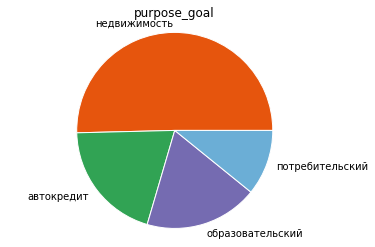

In [96]:
column_pie = ['kids_category','income_category','purpose_goal']
cmap = plt.get_cmap("tab20c")
colors = cmap([4, 8, 12, 1])
for column in column_pie:
   
    fig, ax = plt.subplots()
    ax.set_title(column)
    ax.pie(clients_data[column].value_counts(), labels=clients_data[column].unique(),\
           wedgeprops=dict(edgecolor='w'), colors=colors)
    ax.axis("equal")
    plt.show()

#print(genre_sales)

### Conclusion

*Purpose* column has values with one word based, so the data divided by the purposes are incorrect. Method *mystem* is used for the lemmatisation. The function used for the *purpose* column.

Function for the categorisation by lemma of credit type is used.  Clients income is categorised by the data based on the income in Moscow city. Families with children also were categorised.

Most people in data have income "more than average", only one child and the purpose is property purchase.

### Step 3. Answers on questions

- Is there a link between having children and repaying a loan on time?
- Is there a link between family status and repaying a loan on time? 
- Is there a link between income level and repaying a loan on time? 
- How different purposes are influence on the repaing a loan on time? 

In [97]:
def percent_format(percent): # функция для перевода значения в проценты
    percent = '{:.2%}'.format(percent)
    return percent

In [106]:
kids_data_pivot = clients_data.pivot_table(index=['kids_category'], columns='debt', values='children', aggfunc=['count'])
kids_data_pivot['%'] = (kids_data_pivot[('count', 1)] / (kids_data_pivot[('count', 1)] + kids_data_pivot[('count', 0)]))
kids_data_pivot['%'] = kids_data_pivot['%'].apply(percent_format)
# сводная таблица с процентами по задолжностям у семей с детьми
display(kids_data_pivot.sort_values(by='%'))

count            %
debt                   0     1       
kids_category                        
нет детей          13028  1063  7.54%
многодетная семья    417    39  8.55%
один ребенок        4410   445  9.17%
два ребенка         1858   194  9.45%

According to the debtors table families without children have less debts, than the families with kids.

In [107]:
family_status_data = clients_data.pivot_table(index=['family_status'], columns='debt', values='family_status_id', aggfunc=['count'])
family_status_data['%'] = (family_status_data[('count', 1)] / (family_status_data[('count', 1)] + family_status_data[('count', 0)]))
family_status_data['%'] = family_status_data['%'].apply(percent_format) # summary table with percentages on debts of clients with different marital status
display(family_status_data.sort_values(by='%'))

count           %
debt                       0    1       
family_status                           
вдовец / вдова           896   63  6.57%
в разводе               1110   85  7.11%
женат / замужем        11408  931  7.55%
гражданский брак        3763  388  9.35%
Не женат / не замужем   2536  274  9.75%

Pivot table of clients with different family status. According to this table best payers are widowers, but single people without family have more debts than others.

In [108]:
income_pivot_data = clients_data.pivot_table(index=['income_category'], columns='debt', values='total_income', aggfunc=['count'])
income_pivot_data['%'] = (income_pivot_data[('count', 1)] / (income_pivot_data[('count', 1)] + income_pivot_data[('count', 0)]))
income_pivot_data['%'] = income_pivot_data['%'].apply(percent_format) # pivot table with percentages on debts of clients with different income levels
display(income_pivot_data.sort_values(by='%'))


count            %
debt                 0     1       
income_category                    
богатый           1377   106  7.15%
ниже среднего     2102   174  7.64%
средний           4192   377  8.25%
выше среднего    12042  1084  8.26%

Summary table of debts of clients with different income levels (income level is taken for Moscow). Most of all debts are owned by people with average (средний) and above average (выше среднего) income levels. At the same time, people with an income level of "rich" (богатый) debts are the least.

In [109]:
purpose_pivot_data = clients_data.pivot_table(index=['purpose_goal'], columns='debt', values='purpose', aggfunc=['count'])
purpose_pivot_data['%'] = (purpose_pivot_data[('count', 1)] / (purpose_pivot_data[('count', 1)] + purpose_pivot_data[('count', 0)]))
purpose_pivot_data['%'] = purpose_pivot_data['%'].apply(percent_format) # pivot table with percentages on debts from clients with different goals
display(purpose_pivot_data.sort_values(by='%'))

count           %
debt                  0    1       
purpose_goal                       
недвижимость      10029  782  7.23%
потребительский    2138  186  8.00%
образовательский   3643  370  9.22%
автокредит         3903  403  9.36%

A pivot table of debts from customers with different loan purposes. People who take out a loan for a car or an education do not pay it back more often than others.

## Step 4. General conclusion

Data preprocessing has been carried out. Missing NaN values found, possibly random. The gaps are filled in with the averages for each individual category. Duplicates were also found, removed using dropduplicated. Several columns have their data type changed from float to integer using astype. Lemmatization and categorization of data has been carried out.

For each type of data, leaders among debtors were identified:
- Clients with and without children. Leader - families with two children.
- Clients separated by marital status. The leader is bachelors.
- Clients divided by income level. Leader - with an income level "above average".
- Clients divided by the purpose of the loan. The leader is a car loan.

*If the client is: a bachelor with two children, above average income and takes out a car loan, it is worth considering giving him/her a loan.*